# Chapter 5: DataFrame & Series

## The dataframe class

### First step

In [6]:
import pandas as pd 

df = pd.DataFrame([10, 20, 30, 40], 
                  columns=['numbers'], 
                  index=['a', 'b', 'c', 'd'])

df

,numbers
a,10
b,20
c,30
d,40


In [7]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [8]:
df.columns

Index(['numbers'], dtype='object')

In [9]:
df.loc['c']  # loc is used to access a group of rows and columns by labels or a boolean array. It is primarily label based, but may also be used with a boolean array.

numbers    30
Name: c, dtype: int64

In [10]:
df.loc[['a','d']]  # loc is used to access a group of rows and columns by labels or a boolean array. It is primarily label based, but may also be used with a boolean array.

,numbers
a,10
d,40


In [11]:
df. iloc[1:3]  # iloc is used to access a group of rows and columns by integer position(s) (from 0 to length-1 of the axis), and may also be used with a boolean array. It is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

,numbers
b,20
c,30


In [12]:
df.sum()

numbers    100
dtype: int64

In [13]:
df.apply(lambda x: x**2)

,numbers
a,100
b,400
c,900
d,1600


In [14]:
df**2

,numbers
a,100
b,400
c,900
d,1600


enlarging the DataFrame object in both dimensions

In [15]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [16]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [17]:
df['names'] = pd.DataFrame(['Yves', 'Sandra', 'Lilli', 'Henry'],
                           index=['d', 'a', 'b', 'c'])

df

,numbers,floats,names
a,10,1.5,Sandra
b,20,2.5,Lilli
c,30,3.5,Henry
d,40,4.5,Yves


In [18]:
df[['numbers', 'floats']].mean()

numbers    25.0
floats      3.0
dtype: float64

In [19]:
df[['numbers', 'floats']].std()

numbers    12.909944
floats      1.290994
dtype: float64

### Second step

In [20]:
import numpy as np
np.random.seed(100)

a = np.random.standard_normal((9, 4))
a

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [21]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


| Parameter | Format | Description |
|----------|--------|-------------|
| data     | ndarray/dict/DataFrame | Data for DataFrame; dict can contain Series, ndarray, list |
| index    | Index/array-like       | Index to use; defaults to range(n) |
| columns  | Index/array-like       | Column headers to use; defaults to range(n) |
| dtype    | dtype, default None    | Data type to use/force; otherwise, it is inferred |
| copy     | bool, default None     | Copy data from inputs |

In [22]:
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,No1,No2,No3,No4
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [23]:
df['No2'].mean()

np.float64(0.7010330941456459)

In [24]:
dates = pd.date_range('2019-1-1', periods=9, freq='ME')
dates

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='ME')

| Parameter   | Format             | Description                                      |
|-------------|--------------------|--------------------------------------------------|
| start       | string/datetime    | Left bound for generating dates                  |
| end         | string/datetime    | Right bound for generating dates                 |
| periods     | integer/None       | Number of periods (if start or end is None)      |
| freq        | string/DateOffset  | Frequency string, e.g., 5D for 5 days            |
| tz          | string/None        | Time zone name for localized index               |
| normalize   | bool, default None | Normalizes start and end to midnight             |
| name        | string, default None | Name of resulting index                         |

In [25]:
df.index = dates
df

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,0.981321,0.514219,0.221180,-1.070043
2019-03-31,-0.189496,0.255001,-0.458027,0.435163
2019-04-30,-0.583595,0.816847,0.672721,-0.104411
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318
2019-06-30,1.618982,1.541605,-0.251879,-0.842436
2019-07-31,0.184519,0.937082,0.731000,1.361556
2019-08-31,-0.326238,0.055676,0.222400,-1.443217
2019-09-30,-0.756352,0.816454,0.750445,-0.455947


| 频率字符串 | 含义 | 备注 |
|-----------|------|------|
| `D`       | 日历日（Calendar day） | 每天 |
| `B`       | 工作日（Business day） | 周一至周五，不包括周末（默认不含节假日） |
| `H`       | 小时（Hourly） | 每小时 |
| `T` 或 `min` | 分钟（Minutely） | 每分钟 |
| `S`       | 秒（Secondly） | 每秒 |
| `L` 或 `ms` | 毫秒（Millisecond） | 每毫秒 |
| `U` 或 `us` | 微秒（Microsecond） | 每微秒 |
| `N`       | 纳秒（Nanosecond） | 每纳秒 |
| `W`       | 每周（周日结束） | 默认以周日为一周结束日 |
| `W-SUN`   | 每周（周日结束） | 可替换为 `W-MON`, `W-TUE`, ..., `W-SAT` 指定周结束日 |
| `M`       | 月末（Month end） | 每月最后一个日历日 |
| `MS`      | 月初（Month start） | 每月第一天（1号） |
| `BM`      | 营业月末（Business month end） | 每月最后一个工作日 |
| `BMS`     | 营业月初（Business month start） | 每月第一个工作日 |
| `Q`       | 季度末（Quarter end） | 3月、6月、9月、12月的最后一天 |
| `QS`      | 季度初（Quarter start） | 1月、4月、7月、10月的第一天 |
| `BQ`      | 营业季度末（Business quarter end） | 季度最后一个工作日 |
| `A` 或 `Y` | 年末（Year end） | 默认12月31日 |
| `AS` 或 `YS` | 年初（Year start） | 默认1月1日 |
| `BA` 或 `BY` | 营业年末（Business year end） | 年最后一个工作日 |

In [26]:
df.values

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [27]:
np.array(df)

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

## Basic analytics

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-01-31 to 2019-09-30
Freq: ME
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No1     9 non-null      float64
 1   No2     9 non-null      float64
 2   No3     9 non-null      float64
 3   No4     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


In [29]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.150212,0.701033,0.289193,-0.387788
std,0.988306,0.457685,0.579920,0.877532
min,-1.749765,0.055676,-0.458027,-1.443217
25%,-0.583595,0.342680,-0.251879,-1.070043
50%,-0.326238,0.816454,0.222400,-0.455947
75%,0.184519,0.937082,0.731000,-0.104411
max,1.618982,1.541605,1.153036,1.361556


In [30]:
df.sum()

No1   -1.351906
No2    6.309298
No3    2.602739
No4   -3.490089
dtype: float64

In [31]:
df.mean()

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [32]:
df.mean(axis=0) # axis=0 means that we want to calculate the mean of each column. The result is a Series with the mean of each column.

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [33]:
df.mean(axis=1) # axis=1 means that we want to calculate the mean of each row. The result is a Series with the mean of each row.

2019-01-31   -0.126621
2019-02-28    0.161669
2019-03-31    0.010661
2019-04-30    0.200390
2019-05-31   -0.264500
2019-06-30    0.516568
2019-07-31    0.803539
2019-08-31   -0.372845
2019-09-30    0.088650
Freq: ME, dtype: float64

In [34]:
df.cumsum() # cumsum is used to calculate the cumulative sum of the values in a DataFrame. The result is a DataFrame with the same shape as the original DataFrame, but with the cumulative sum of the values in each column.

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,-0.768445,0.856899,1.374215,-1.322479
2019-03-31,-0.957941,1.111901,0.916188,-0.887316
2019-04-30,-1.541536,1.928748,1.588909,-0.991727
2019-05-31,-2.072816,2.958480,1.150774,-2.110045
2019-06-30,-0.453834,4.500086,0.898895,-2.952481
2019-07-31,-0.269316,5.437168,1.629895,-1.590925
2019-08-31,-0.595554,5.492844,1.852294,-3.034142
2019-09-30,-1.351906,6.309298,2.602739,-3.490089


In [35]:
np.mean(df, axis=0) # np.mean is used to calculate the mean of the values in a DataFrame. The result is a Series with the mean of each column.

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [36]:
np.log(df) # np.log is used to calculate the natural logarithm of the values in a DataFrame. The result is a DataFrame with the same shape as the original DataFrame, but with the natural logarithm of the values in each column.

c:\Users\bihui\miniconda3\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,No1,No2,No3,No4
2019-01-31,NaN,-1.070957,0.142398,NaN
2019-02-28,-0.018856,-0.665106,-1.508780,NaN
2019-03-31,NaN,-1.366486,NaN,-0.832033
2019-04-30,NaN,-0.202303,-0.396425,NaN
2019-05-31,NaN,0.029299,NaN,NaN
2019-06-30,0.481797,0.432824,NaN,NaN
2019-07-31,-1.690005,-0.064984,-0.313341,0.308628
2019-08-31,NaN,-2.888206,-1.503279,NaN
2019-09-30,NaN,-0.202785,-0.287089,NaN


In [37]:
np.sqrt(abs(df)) # this means that we want to calculate the square root of the absolute value of the values in a DataFrame. The result is a DataFrame with the same shape as the original DataFrame, but with the square root of the absolute value of the values in each column. We use abs() to avoid getting NaN values when we try to calculate the square root of negative numbers.

,No1,No2,No3,No4
2019-01-31,1.322787,0.585389,1.073795,0.502430
2019-02-28,0.990616,0.717091,0.470297,1.034429
2019-03-31,0.435311,0.504977,0.676777,0.659669
2019-04-30,0.763934,0.903796,0.820196,0.323127
2019-05-31,0.728890,1.014757,0.661918,1.057506
2019-06-30,1.272392,1.241614,0.501876,0.917843
2019-07-31,0.429556,0.968030,0.854986,1.166857
2019-08-31,0.571173,0.235958,0.471593,1.201340
2019-09-30,0.869685,0.903578,0.866282,0.675238


In [38]:
np.sqrt(abs(df).sum()) # this means that we want to calculate the square root of the sum of the absolute value of the values in a DataFrame. The result is a single value, which is the square root of the sum of the absolute value of the values in each column. We use abs() to avoid getting NaN values when we try to calculate the square root of negative numbers.

No1    2.630884
No2    2.511832
No3    2.213328
No4    2.661490
dtype: float64

In [39]:
np.sqrt(abs(df)).sum() # this means that we want to calculate the sum of the square root of the absolute value of the values in a DataFrame. The result is a Series with the sum of the square root of the absolute value of the values in each column. We use abs() to avoid getting NaN values when we try to calculate the square root of negative numbers.

No1    7.384345
No2    7.075190
No3    6.397719
No4    7.538440
dtype: float64

In [40]:
100 * df + 100

,No1,No2,No3,No4
2019-01-31,-74.976547,134.268040,215.303580,74.756396
2019-02-28,198.132079,151.421884,122.117967,-7.004333
2019-03-31,81.050417,125.500144,54.197301,143.516349
2019-04-30,41.640495,181.684707,167.272081,89.558886
2019-05-31,46.871962,202.973269,56.186438,-11.831825
2019-06-30,261.898166,254.160517,74.812086,15.756426
2019-07-31,118.451869,193.708220,173.100034,236.155613
2019-08-31,67.376194,105.567601,122.239961,-44.321700
2019-09-30,24.364769,181.645401,175.044476,54.405307


## Basic visualization

<Axes: >

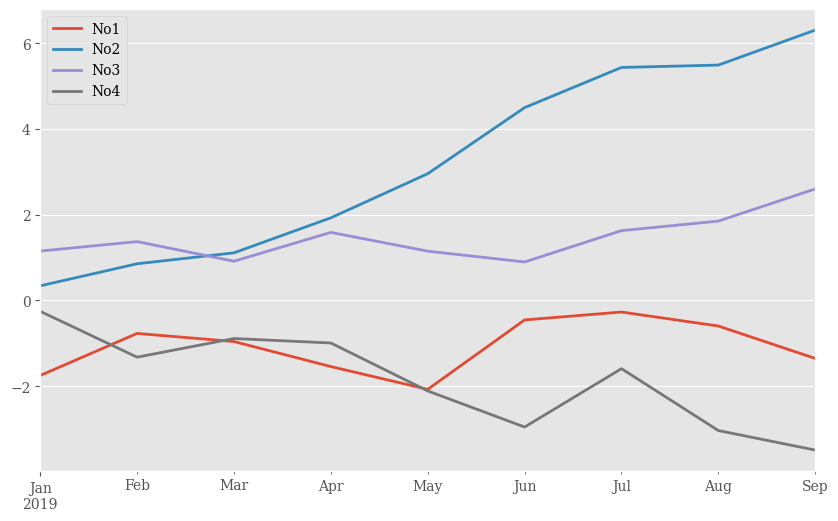

In [41]:
from pylab import plt, mpl

# 改用 Matplotlib 自带的美观风格（例如 'ggplot'）
plt.style.use('ggplot')  

mpl.rcParams['font.family'] = 'serif'

%matplotlib inline

df.cumsum().plot(lw=2.0, figsize=(10, 6))

| Parameter       | Format                              | Description |
|------------------|--------------------------------------|-------------|
| x                | label/position, default None         | Only used when column values are x-ticks |
| y                | label/position, default None         | Only used when column values are y-ticks |
| subplots         | boolean, default False               | Plot columns in subplots |
| sharex           | boolean, default True                | Share the x-axis |
| sharey           | boolean, default False               | Share the y-axis |
| use_index        | boolean, default True                | Use DataFrame.index as x-ticks |
| stacked          | boolean, default False               | Stack (only for bar plots) |
| sort_columns     | boolean, default False               | Sort columns alphabetically before plotting |
| title            | string, default None                 | Title for the plot |
| grid             | boolean, default False               | Show horizontal and vertical grid lines |
| legend           | boolean, default True                | Show legend of labels |
| ax               | matplotlib axis object               | matplotlib axis object to use for plotting |
| style            | string or list/dictionary            | Line plotting style (for each column) |
| kind             | string (e.g., "line", "bar", "barh", "kde", "density") | Type of plot |
| logx             | boolean, default False               | Use logarithmic scaling of x-axis |
| logy             | boolean, default False               | Use logarithmic scaling of y-axis |
| xticks           | sequence, default Index                | X-ticks for the plot |
| yticks           | sequence, default Values               | Y-ticks for the plot |
| xlim             | 2-tuple, list                          | Boundaries for x-axis |
| ylim             | 2-tuple, list                          | Boundaries for y-axis |
| rot              | integer, default None                  | Rotation of x-ticks |
| secondary_y      | boolean/sequence, default False        | Plot on secondary y-axis |
| mark_right       | boolean, default True                  | Automatic labeling of secondary axis |
| colormap         | string/cmap object, default None       | Color map to use for plotting |
| kws              | keywords                               | Options to pass to matplotlib |

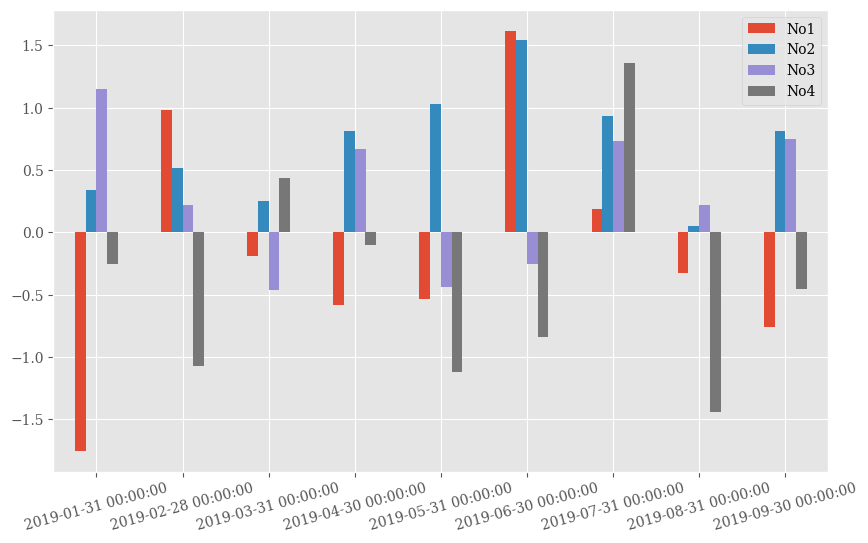

In [42]:
df.plot.bar(figsize=(10, 6), rot=15);

### The series class

In [43]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
S = pd.Series(np.linspace(0, 15, 7), name ='series')  
# 生成 7 个从 0 到 15 均匀分布的数, 转为带名称的 pandas 一维数组

0     0.0
1     2.5
2     5.0
3     7.5
4    10.0
5    12.5
6    15.0
Name: series, dtype: float64

In [47]:
type(S)

pandas.core.series.Series

In [49]:
s = df['No1']
s

2019-01-31   -1.749765
2019-02-28    0.981321
2019-03-31   -0.189496
2019-04-30   -0.583595
2019-05-31   -0.531280
2019-06-30    1.618982
2019-07-31    0.184519
2019-08-31   -0.326238
2019-09-30   -0.756352
Freq: ME, Name: No1, dtype: float64

In [50]:
type(s)

pandas.core.series.Series

In [51]:
s.mean()

np.float64(-0.15021177307319458)

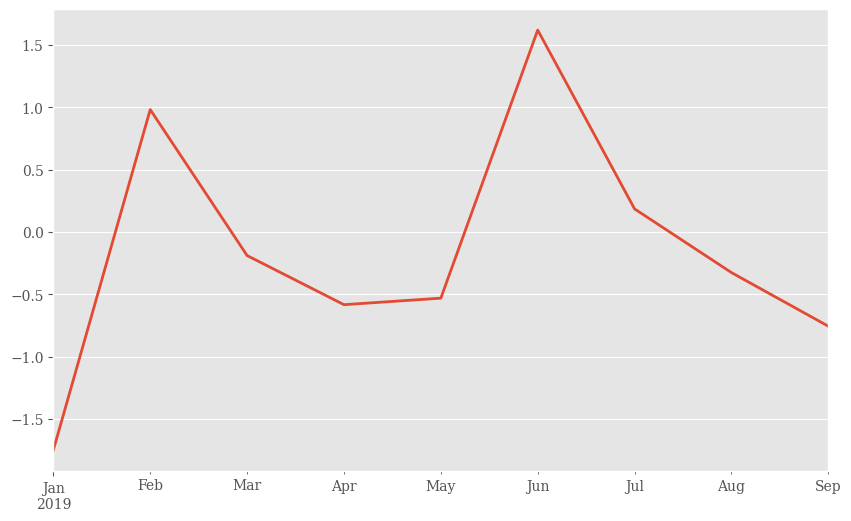

In [ ]:
s.plot(lw=2.0, figsize=(10, 6));  
# 对 Series s 绘制默认折线图，设置线条宽度为 2.0， 设置图形大小为 10 英寸宽 × 6 英寸高

### GroupBy operations

In [53]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2',
                 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2019-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1
2019-02-28,0.981321,0.514219,0.221180,-1.070043,Q1
2019-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1
2019-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2
2019-07-31,0.184519,0.937082,0.731000,1.361556,Q3
2019-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3
2019-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3


In [54]:
groups = df.groupby('Quarter')
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [ ]:
groups.mean() 

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.319314,0.370634,0.305396,-0.295772
Q2,0.168035,1.129395,-0.005765,-0.688388
Q3,-0.299357,0.603071,0.567948,-0.179203


In [56]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.981321,0.514219,1.153036,0.435163
Q2,1.618982,1.541605,0.672721,-0.104411
Q3,0.184519,0.937082,0.750445,1.361556


In [57]:
groups.aggregate([min, max]).round(2)

C:\Users\bihui\AppData\Local\Temp\ipykernel_4128\2168091236.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  groups.aggregate([min, max]).round(2)
C:\Users\bihui\AppData\Local\Temp\ipykernel_4128\2168091236.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  groups.aggregate([min, max]).round(2)


No1         No2         No3         No4      
          min   max   min   max   min   max   min   max
Quarter                                                
Q1      -1.75  0.98  0.26  0.51 -0.46  1.15 -1.07  0.44
Q2      -0.58  1.62  0.82  1.54 -0.44  0.67 -1.12 -0.10
Q3      -0.76  0.18  0.06  0.94  0.22  0.75 -1.44  1.36

In [59]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

groups = df.groupby(['Quarter', 'Odd_Even'])

groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [60]:
groups[['No1', 'No4']].aggregate([sum, np.mean])

C:\Users\bihui\AppData\Local\Temp\ipykernel_4128\2313223015.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  groups[['No1', 'No4']].aggregate([sum, np.mean])
C:\Users\bihui\AppData\Local\Temp\ipykernel_4128\2313223015.py:1: FutureWarning: The provided callable <function mean at 0x0000020F2F1622A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  groups[['No1', 'No4']].aggregate([sum, np.mean])


No1                 No4          
                       sum      mean       sum      mean
Quarter Odd_Even                                        
Q1      Even      0.981321  0.981321 -1.070043 -1.070043
        Odd      -1.939261 -0.969631  0.182727  0.091364
Q2      Even      1.035387  0.517693 -0.946847 -0.473423
        Odd      -0.531280 -0.531280 -1.118318 -1.118318
Q3      Even     -0.326238 -0.326238 -1.443217 -1.443217
        Odd      -0.571834 -0.285917  0.905609  0.452805

### Complex Selection

In [62]:
data = np.random.standard_normal((10, 2))

df = pd.DataFrame(data, columns=['x', 'y'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10 non-null     float64
 1   y       10 non-null     float64
dtypes: float64(2)
memory usage: 292.0 bytes


In [63]:
df.head()

,x,y
0,-0.862227,1.249470
1,-0.079611,-0.889731
2,-0.881798,0.018639
3,0.237845,0.013549
4,-1.635529,-1.044210


In [64]:
df.tail()

,x,y
5,0.613039,0.736205
6,1.026921,-1.432191
7,-1.841188,0.366093
8,-0.331777,-0.689218
9,2.034608,-0.550714


In [65]:
df['x'] > 0.5

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7    False
8    False
9     True
Name: x, dtype: bool

In [66]:
(df['x'] > 0) & (df['y'] < 0)

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9     True
dtype: bool

In [67]:
(df['x'] > 0) | (df['y'] < 0)

0    False
1     True
2    False
3     True
4     True
5     True
6     True
7    False
8     True
9     True
dtype: bool

In [68]:
df[df['x'] > 0]

,x,y
3,0.237845,0.013549
5,0.613039,0.736205
6,1.026921,-1.432191
9,2.034608,-0.550714


In [69]:
df.query('x > 0')

,x,y
3,0.237845,0.013549
5,0.613039,0.736205
6,1.026921,-1.432191
9,2.034608,-0.550714


In [70]:
df[(df['x'] > 0) & (df['y'] < 0)]

,x,y
6,1.026921,-1.432191
9,2.034608,-0.550714


In [71]:
df.query('x > 0 & y < 0')

,x,y
6,1.026921,-1.432191
9,2.034608,-0.550714


In [72]:
df[(df.x > 0) | (df.y < 0)]

,x,y
1,-0.079611,-0.889731
3,0.237845,0.013549
4,-1.635529,-1.044210
5,0.613039,0.736205
6,1.026921,-1.432191
8,-0.331777,-0.689218
9,2.034608,-0.550714


In [73]:
df > 0

,x,y
0,False,True
1,False,False
2,False,True
3,True,True
4,False,False
5,True,True
6,True,False
7,False,True
8,False,False
9,True,False


In [74]:
df[df > 0]  # 筛选 DataFrame 中大于 0 的元素

,x,y
0,NaN,1.249470
1,NaN,NaN
2,NaN,0.018639
3,0.237845,0.013549
4,NaN,NaN
5,0.613039,0.736205
6,1.026921,NaN
7,NaN,0.366093
8,NaN,NaN
9,2.034608,NaN


## Concatenation, Joining, and Merging

In [76]:
df1 = pd.DataFrame(['100', '200', '300', '400'],
                   index=['a', 'b', 'c', 'd'],
                   columns=['A',])

df1

,A
a,100
b,200
c,300
d,400


In [78]:
df2 = pd.DataFrame(['200', '150', '50'],
                   index=['f', 'b', 'd'],
                   columns=['B',])
df2

,B
f,200
b,150
d,50


### Concatenation（拼接）

In [ ]:
pd.concat([df1, df2])

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [81]:
pd.concat((df1, df2), ignore_index=True, sort=False)

,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


### Joining

In [82]:
df1.join(df2)

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [83]:
df2.join(df1)

,B,A
f,200,NaN
b,150,200
d,50,400


In [84]:
df1.join(df2, how='left')

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [85]:
df1.join(df2, how='right')

,A,B
f,NaN,200
b,200,150
d,400,50


In [ ]:
df1.join(df2, how='inner')  
# Inner join only preserves those index values found in both indices.
# 对 df1 和 df2 执行“内连接”（inner join），只保留两个 DataFrame 中都存在的索引（index）对应的行

,A,B
b,200,150
d,400,50


In [87]:
df1.join(df2, how='outer')
# 保留 df1 和 df2 中所有出现过的索引值（取并集），缺失的部分用 NaN 填充

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


In [89]:
df = pd.DataFrame()
df['A'] = df1['A']
df

,A
a,100
b,200
c,300
d,400


In [91]:
df['B'] = df2
df

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [92]:
df = pd.DataFrame({'A': df1['A'], 'B': df2['B']}) 
df

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


### Merging

In [93]:
c = pd.Series([250, 150, 50], index=['b', 'd', 'c'])
df1['C'] = c
df2['C'] = c

df1

,A,C
a,100,NaN
b,200,250.0
c,300,50.0
d,400,150.0


In [94]:
df2

,B,C
f,200,NaN
b,150,250.0
d,50,150.0


In [95]:
pd.merge(df1, df2)

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [96]:
pd.merge(df1, df2, on='C')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [97]:
pd.merge(df1, df2, how='outer')

,A,C,B
0,300,50.0,NaN
1,400,150.0,50
2,200,250.0,150
3,100,NaN,200


In [ ]:
pd.merge(df1, df2, left_on='A', right_on='B')
# 将 df1 和 df2 合并，使得 df1 中的列 'A' 与 df2 中的列 'B' 的值相等的行被匹配到一起。

,A,C_x,B,C_y
0,200,250.0,200,NaN


In [ ]:
pd.merge(df1, df2, left_on='A', right_on='B', how='outer')
# 保留 df1 和 df2 中所有行，只要 df1['A'] 或 df2['B'] 中出现过的值都包含在结果中；无法匹配的部分用 NaN 填充。

,A,C_x,B,C_y
0,100,NaN,NaN,NaN
1,NaN,NaN,150,250.0
2,200,250.0,200,NaN
3,300,50.0,NaN,NaN
4,400,150.0,NaN,NaN
5,NaN,NaN,50,150.0


In [101]:
pd.merge(df1, df2, left_index=True, right_index=True)

,A,C_x,B,C_y
b,200,250.0,150,250.0
d,400,150.0,50,150.0


In [103]:
pd.merge(df1, df2, on='C')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


## Performance aspects

In [ ]:
data = np.random.standard_normal((1000000, 2)) 
data.nbytes  # nbytes = 元素个数 × 每个元素占用的字节数

16000000

In [107]:
df = pd.DataFrame(data, columns=['x', 'y'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1000000 non-null  float64
 1   y       1000000 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [108]:
%time res = df['x'] + df['y']

CPU times: total: 0 ns
Wall time: 2.48 ms


In [ ]:
res[:3]   # 取对象 res 的前 3 个元素（从索引 0 开始，到索引 3 之前，不包括索引 3）。

0   -0.556539
1   -0.523950
2    1.377012
dtype: float64

In [ ]:
%time res = df.sum(axis=1) # This calculates the sums by calling the sum() method on the DataFrame object.

CPU times: total: 93.8 ms
Wall time: 80.6 ms


In [ ]:
%time res = df.values.sum(axis=1) # This calculates the sums by calling the sum() method on the ndarray object.

CPU times: total: 0 ns
Wall time: 10.5 ms


In [112]:
res[:3]

array([-0.55653901, -0.52394976,  1.37701154])

In [ ]:
%time res = np.sum(df, axis=1)  # This calculates the sums by using the function np.sum() on the DataFrame

CPU times: total: 78.1 ms
Wall time: 80.5 ms


In [114]:
res[:3]

0   -0.556539
1   -0.523950
2    1.377012
dtype: float64

In [ ]:
%time res = np.sum(df.values, axis=1) # This calculates the sums by using the function np.sum() on the ndarray object.

CPU times: total: 31.2 ms
Wall time: 8.68 ms


In [ ]:
%time res = df.eval('x + y')
# eval() is a method dedicated to evaluation of (complex) numerical expressions; columns can be directly addressed.

CPU times: total: 219 ms
Wall time: 10 ms


In [117]:
res[:3]

0   -0.556539
1   -0.523950
2    1.377012
dtype: float64

In [ ]:
%time res = df.apply(lambda row: row['x'] + row['y'], axis=1)
# The slowest option is to use the apply() method row-by-row; this is like looping on the Python level over all rows

CPU times: total: 4.89 s
Wall time: 4.94 s


In [119]:
res[:3]

0   -0.556539
1   -0.523950
2    1.377012
dtype: float64